In [2]:
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('data/test_timeseries/test_timeseries.csv',parse_dates=['date'])
df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,...,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,...,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN
2271945,56043,2020-12-29,0.00,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,...,-10.81,2.70,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5182
2271946,56043,2020-12-30,0.01,82.87,1.57,-6.40,-13.94,-10.17,1.33,-12.16,...,-8.74,2.93,4.10,1.62,2.48,4.42,6.05,2.79,3.26,NaN


In [76]:
label = pd.read_csv('data/label.csv')
label.T

,0
fips,US county FIPS code. see: https://www.nrcs.usd...
calendar_todaydate,observation date
grid_3x3PRECTOT,Precipitation (mm day-1)
grid_3x3PS,Surface Pressure (kPa)
grid_3x3QV2M,Specific Humidity at 2 Meters (g/kg)
grid_3x3T2M,Temperature at 2 Meters (C)
grid_3x3T2MDEW,Dew/Frost Point at 2 Meters (C)
grid_3x3T2MWET,Wet Bulb Temperature at 2 Meters (C)
grid_3x3T2M_MAX,Maximum Temperature at 2 Meters (C)
grid_3x3T2M_MIN,Minimum Temperature at 2 Meters (C)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 21 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        float64       
dtypes: datetime64[ns](1), float64(19), int64(1)
memory usage: 364.0 MB


In [78]:
df.isnull().sum()

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64

In [79]:
df['fips'].nunique()

3108

<AxesSubplot:>

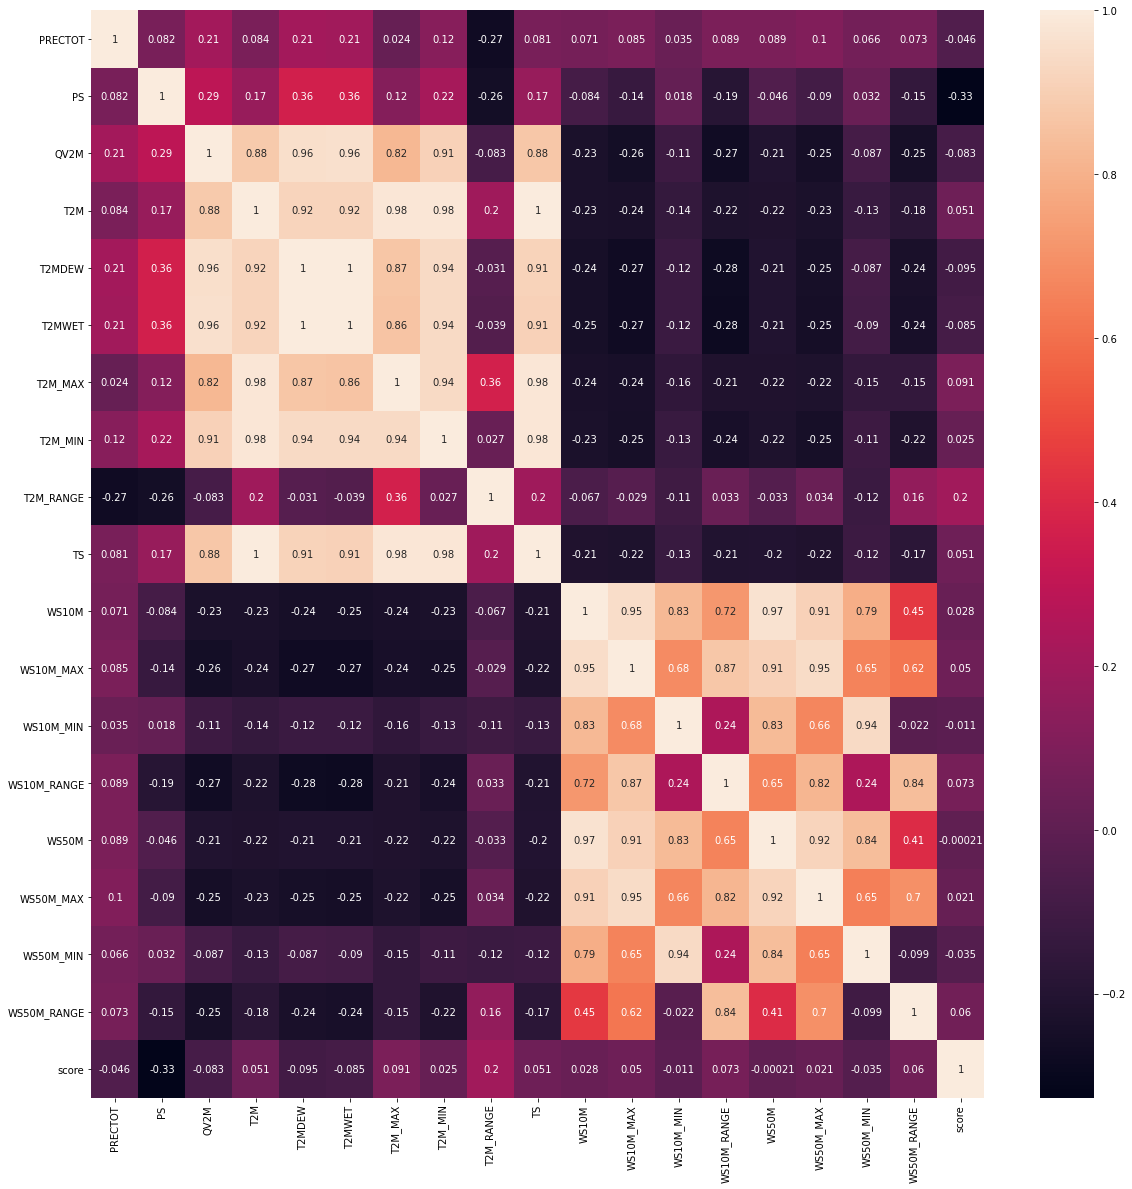

In [155]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns=['fips','date']).corr(),annot=True)

In [127]:
# --- In case, selection of columns for multi-collinearity issue
# new_df = df[['fips','date', 'PRECTOT', 'PS', 'T2M', 'T2M_RANGE', 'WS10M', 'WS50M_RANGE','score']]
new_df=df
new_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,...,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,...,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,...,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN
2271945,56043,2020-12-29,0.00,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,...,-10.81,2.70,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5182
2271946,56043,2020-12-30,0.01,82.87,1.57,-6.40,-13.94,-10.17,1.33,-12.16,...,-8.74,2.93,4.10,1.62,2.48,4.42,6.05,2.79,3.26,NaN


In [128]:
new_df[new_df['date'].dt.weekday == 1]['score'].isnull().sum()

0

In [129]:
new_df = new_df[(df['date'] > pd.Timestamp(2019,1,1)) & (df['date'] < pd.Timestamp(2020,12,30))]
new_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,...,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,...,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,...,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,...,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
5,1001,2019-01-06,0.00,100.69,5.76,10.26,5.94,5.82,18.38,2.31,...,8.57,1.37,2.04,0.22,1.82,2.36,4.93,0.35,4.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271941,56043,2020-12-25,0.00,83.10,2.18,-3.65,-9.82,-6.73,4.54,-8.46,...,-4.93,4.06,4.79,3.30,1.50,6.61,8.31,4.72,3.59,NaN
2271942,56043,2020-12-26,1.29,82.50,2.66,-1.78,-7.35,-4.57,2.59,-5.28,...,-3.20,4.29,5.34,2.76,2.57,6.87,8.67,4.72,3.95,NaN
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,...,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,...,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN


In [130]:
week_df = new_df.groupby('fips').resample('W-TUE', on='date', label='right',closed='right').mean()

week_df = week_df.drop(columns=['fips']).reset_index()

# --- Dropping column for mutlicollinearity

# week_df = week_df.drop(columns=['PS','WS50M_RANGE','T2M_RANGE'])

# ---

week_df['score'] = week_df['score'].round().astype(int)

week_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-08,5.988571,100.325714,7.432857,11.331429,9.334286,9.168571,17.271429,6.542857,...,11.012857,2.080000,3.100000,1.124286,1.974286,4.075714,6.244286,2.172857,4.071429,0
1,1001,2019-01-15,1.595714,100.844286,4.768571,5.620000,2.870000,2.715714,11.077143,1.025714,...,5.602857,2.372857,3.214286,1.718571,1.495714,4.565714,5.957143,3.401429,2.557143,0
2,1001,2019-01-22,4.118571,100.597143,5.472857,6.492857,3.995714,3.752857,12.291429,0.280000,...,6.104286,2.644286,3.752857,1.468571,2.285714,4.828571,7.045714,2.884286,4.161429,0
3,1001,2019-01-29,8.361429,100.404286,4.734286,5.395714,2.294286,2.107143,11.401429,-0.671429,...,4.821429,2.561429,3.828571,1.430000,2.397143,4.658571,6.860000,2.715714,4.144286,0
4,1001,2019-02-05,0.312857,100.647143,6.867143,9.410000,6.965714,6.862857,16.411429,3.641429,...,9.177143,1.752857,2.424286,0.958571,1.464286,3.720000,5.700000,1.521429,4.178571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323227,56043,2020-12-01,0.254286,83.315714,2.264286,-1.762857,-9.415714,-7.962857,4.538571,-6.305714,...,-2.600000,3.524286,5.301429,1.932857,3.371429,5.467143,7.657143,3.088571,4.568571,4
323228,56043,2020-12-08,0.000000,83.890000,1.895714,-1.410000,-11.617143,-6.515714,5.211429,-5.534286,...,-4.058571,2.024286,2.814286,1.150000,1.665714,3.084286,4.588571,1.758571,2.830000,4
323229,56043,2020-12-15,1.014286,82.878571,2.211429,-4.488571,-9.947143,-7.217143,-0.511429,-7.604286,...,-5.275714,2.917143,4.657143,1.302857,3.352857,4.342857,6.597143,2.017143,4.581429,4
323230,56043,2020-12-22,0.800000,82.717143,2.850000,-1.897143,-6.667143,-4.281429,4.004286,-6.581429,...,-3.534286,5.058571,7.348571,3.462857,3.885714,7.721429,10.355714,5.382857,4.970000,4


In [ ]:
week_df.to_csv('../week_score.csv', index=False)

In [14]:
week_df['score'].isnull().sum()

0

In [131]:
# ----------- Split data
from sklearn.model_selection import train_test_split
y = week_df.iloc[:,-1]
X = week_df.iloc[:,2:-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [132]:
X_train.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
176748,0.000000,96.018571,3.114286,-0.508571,-3.354286,-3.447143,4.875714,-4.837143,9.714286,-1.450000,5.124286,7.495714,2.724286,4.771429,8.121429,10.884286,4.714286,6.170000
93598,0.015714,98.320000,3.594286,2.602857,-1.244286,0.678571,8.968571,-1.704286,10.672857,1.897143,4.754286,7.208571,2.041429,5.167143,7.131429,10.955714,3.364286,7.590000
74780,0.935714,98.807143,2.975714,-6.700000,-8.652857,-7.792857,-1.407143,-11.654286,10.245714,-6.671429,5.530000,7.561429,3.615714,3.948571,7.737143,9.955714,5.254286,4.698571
105852,3.274286,98.680000,14.082857,23.244286,19.117143,19.014286,28.288571,18.350000,9.940000,23.145714,1.438571,2.244286,0.545714,1.698571,3.082857,4.941429,0.942857,4.000000
235230,2.982857,97.064286,11.648571,20.242857,15.580000,15.448571,25.790000,15.308571,10.480000,20.214286,1.875714,2.748571,0.954286,1.794286,4.251429,5.711429,2.361429,3.351429


In [133]:
# --- VIF: finding multi-collinearity issue, in case need to drop column

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(X_train)

,variables,VIF
0,PRECTOT,2.503303e+00
1,PS,6.974468e+01
2,QV2M,6.468265e+01
3,T2M,3.987198e+03
4,T2MDEW,8.103384e+02
5,T2MWET,8.724131e+02
6,T2M_MAX,1.298324e+08
7,T2M_MIN,4.558202e+07
8,T2M_RANGE,3.523112e+07
9,TS,1.112601e+03


In [134]:
y_train.head()

176748    0
93598     2
74780     0
105852    0
235230    0
Name: score, dtype: int32

In [135]:
# ----------- Decision Tree draft
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=15)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[46388,  1785,   631,   203,    81,     7],
       [ 5305,  2241,   651,   147,    44,    11],
       [ 2190,   921,  1012,   220,    71,    11],
       [  797,   276,   360,   331,    97,     9],
       [  237,    73,   100,   129,   142,    20],
       [   25,    21,    19,    16,    27,    49]], dtype=int64)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     49095
           1       0.42      0.27      0.33      8399
           2       0.36      0.23      0.28      4425
           3       0.32      0.18      0.23      1870
           4       0.31      0.20      0.24       701
           5       0.46      0.31      0.37       157

    accuracy                           0.78     64647
   macro avg       0.45      0.36      0.39     64647
weighted avg       0.73      0.78      0.75     64647



In [115]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_0 <= 1.09
|   |--- feature_1 <= 8.16
|   |   |--- feature_1 <= -3.03
|   |   |   |--- feature_2 <= 3.92
|   |   |   |   |--- feature_2 <= 2.41
|   |   |   |   |   |--- feature_1 <= -11.39
|   |   |   |   |   |   |--- feature_1 <= -18.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  -18.00
|   |   |   |   |   |   |   |--- feature_0 <= 1.06
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.49
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  0.49
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.93
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.81
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  1.81
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.93
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |  

In [66]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(dtc,filled=True)

[Text(792.7294568364263, 1579.8374999999999, 'X[3] <= 12.639\ngini = 0.403\nsamples = 258585\nvalue = [195873, 33943, 17618, 7655, 2858, 638]'),
 Text(312.71280847085046, 1477.9125, 'X[1] <= 92.351\ngini = 0.304\nsamples = 193741\nvalue = [160067, 20708, 8854, 3000, 868, 244]'),
 Text(115.62965537853057, 1375.9875, 'X[1] <= 81.021\ngini = 0.637\nsamples = 13849\nvalue = [7578, 2819, 1800, 866, 542, 244]'),
 Text(49.293473057070074, 1274.0625, 'X[5] <= 4.199\ngini = 0.75\nsamples = 3200\nvalue = [1280, 556, 654, 335, 218, 157]'),
 Text(27.585632485698962, 1172.1375, 'X[2] <= 0.219\ngini = 0.679\nsamples = 1333\nvalue = [677, 219, 217, 94, 61, 65]'),
 Text(17.889490972470504, 1070.2125, 'X[1] <= 77.531\ngini = 0.713\nsamples = 1017\nvalue = [467, 179, 187, 80, 45, 59]'),
 Text(8.169503038970326, 968.2875, 'X[4] <= 2.259\ngini = 0.762\nsamples = 550\nvalue = [211, 91, 114, 54, 33, 47]'),
 Text(3.4357548265999287, 866.3625, 'X[3] <= 12.514\ngini = 0.823\nsamples = 124\nvalue = [26, 19, 18,

Error in callback <function flush_figures at 0x00000196BFC808B8> (for post_execute):


KeyboardInterrupt: 

In [153]:
# --- Random forest
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes=16, n_jobs = -1, random_state = 42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)

0.7594319922038145

In [156]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     49095
           1       0.00      0.00      0.00      8399
           2       0.00      0.00      0.00      4425
           3       0.00      0.00      0.00      1870
           4       0.00      0.00      0.00       701
           5       0.00      0.00      0.00       157

    accuracy                           0.76     64647
   macro avg       0.13      0.17      0.14     64647
weighted avg       0.58      0.76      0.66     64647



C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
